In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/my-titanic-01/test1.csv
/kaggle/input/my-titanic-01/train1.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/my-titanic-01/train1.csv', index_col = 0)
test = pd.read_csv('/kaggle/input/my-titanic-01/test1.csv', index_col = 0)
ss = pd.read_csv('/kaggle/input/titanic/gender_submission.csv', index_col = 0)

In [3]:
ss1 = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [4]:
ss1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int64  
 9   Family    891 non-null    int64  
 10  Solo      891 non-null    bool   
 11  Title     891 non-null    object 
dtypes: bool(1), float64(2), int64(7), object(2)
memory usage: 84.4+ KB


In [6]:
test.drop('Cabin', axis=1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    int64  
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    int64  
 8   Family    418 non-null    int64  
 9   Solo      418 non-null    bool   
 10  Title     418 non-null    object 
dtypes: bool(1), float64(2), int64(6), object(2)
memory usage: 36.3+ KB


1회차에서 컬럼분석은 끝내고 간단한 전처리만 진행한 상태였다.

우선 Age Column의 결측값을 채우기 위해서 category한 column들에 대해 pd.get_dummies or LabelEncoder()를 사용할 예정이다.

pd.get_dummies() 같은 경우 bin 형태의 데이터 처리를 진행시에 사용하고

LabelEncoder() 같은 경우 category가 3개 이상으로 있을 경우 각각 1 + 2 = 3이 아닌 1, 2, 3이 다른 분류를 나타낸다는 것을 적용시키는 함수이다.

In [7]:
test['Title'].replace('Dona', 'Mrs', inplace=True)

In [8]:
train['Title'].value_counts()

Mr        526
Miss      185
Mrs       127
Master     40
Dr          7
Rev         6
Name: Title, dtype: int64

In [9]:
# 1.0 LabelEncoding to categorical Columns
# 1.0 카테고리 컬럼들에게 라벨 인코딩
# Pclass, Embarked, Title
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['Pclass'])
train['Pclass'] = le.transform(train['Pclass'])

le = LabelEncoder()
le.fit(test['Pclass'])
test['Pclass'] = le.transform(test['Pclass'])

le = LabelEncoder()
le.fit(train['Embarked'])
train['Embarked'] = le.transform(train['Embarked'])

le = LabelEncoder()
le.fit(test['Embarked'])
test['Embarked'] = le.transform(test['Embarked'])

In [10]:
le = LabelEncoder()
le.fit(train['Title'])
train['Label_Title'] = le.transform(train['Title'])

le = LabelEncoder()
le.fit(test['Title'])
test['Label_Title'] = le.transform(test['Title'])

In [11]:
# 1.1 One_hot_encoding to bin Columns
# 1.1 One-hot_encdoing 적용
pd.get_dummies(train['Sex'])
pd.get_dummies(train['Solo'])

pd.get_dummies(test['Sex'])
pd.get_dummies(test['Solo'])

,False,True
PassengerId,,
892,0,1
893,1,0
894,0,1
895,0,1
896,1,0
...,...,...
1305,0,1
1306,0,1
1307,0,1


In [12]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [13]:
train["Log_Fare"] = np.log1p(train["Fare"])
test["Log_Fare"] = np.log1p(test["Fare"])

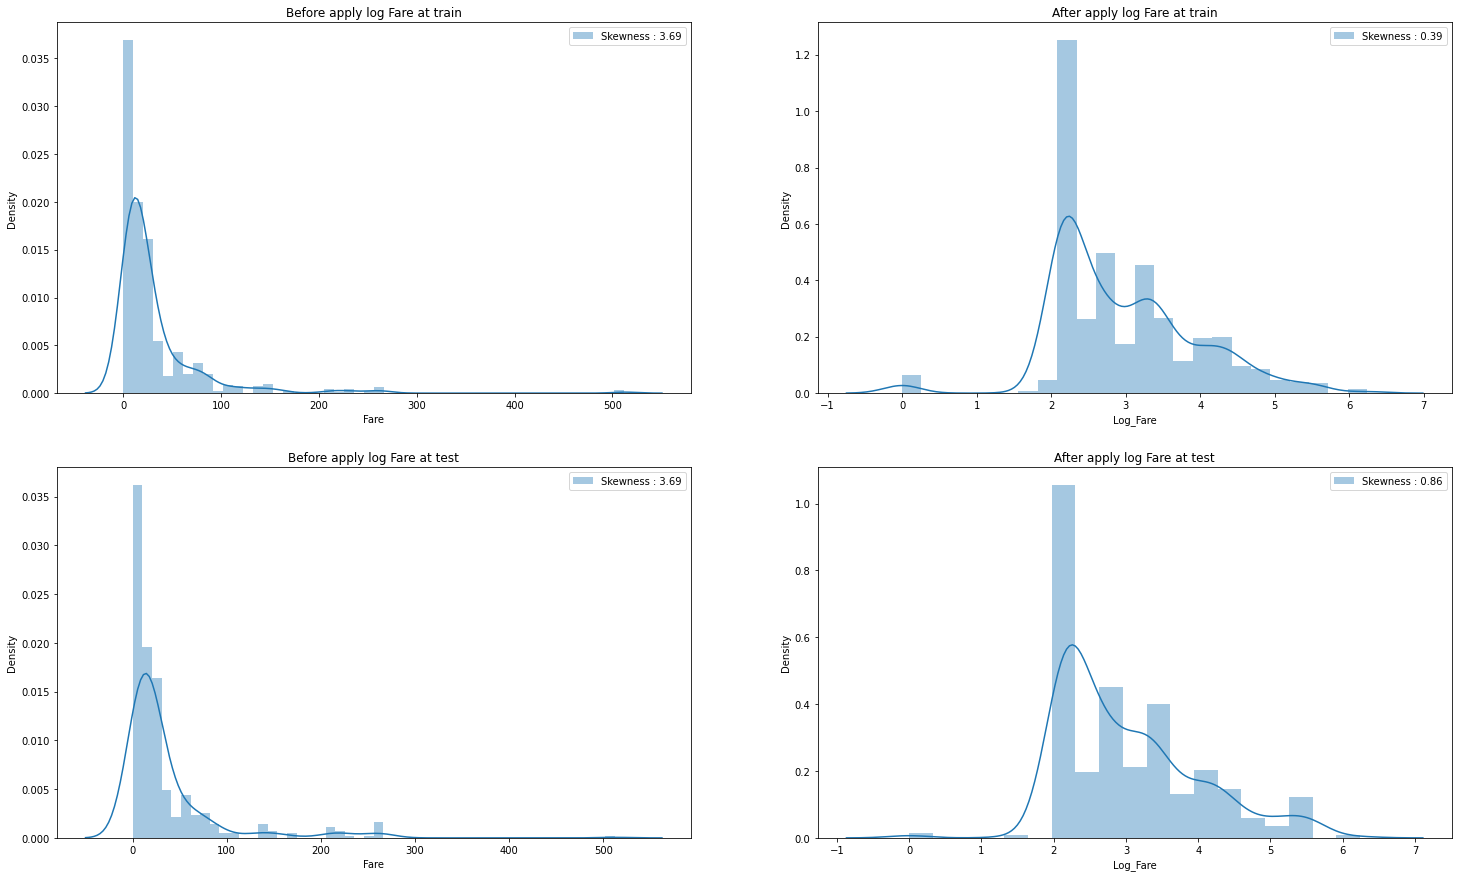

In [14]:
f, ax = plt.subplots(2, 2, figsize = (25, 15))
g1 = sns.distplot(train['Fare'], label='Skewness : {:.2f}'.format(test['Fare'].skew()), ax=ax[0][0])
g2 = sns.distplot(train['Log_Fare'], label='Skewness : {:.2f}'.format(train['Log_Fare'].skew()), ax=ax[0][1])
g3 = sns.distplot(test['Fare'], label='Skewness : {:.2f}'.format(test['Fare'].skew()), ax=ax[1][0])
g4 = sns.distplot(test['Log_Fare'], label='Skewness : {:.2f}'.format(test['Log_Fare'].skew()), ax=ax[1][1])

ax[0][0].set_title('Before apply log Fare at train')
ax[0][1].set_title('After apply log Fare at train')
ax[1][0].set_title('Before apply log Fare at test')
ax[1][1].set_title('After apply log Fare at test')

g1 = g1.legend(loc = 'best')
g2 = g2.legend(loc = 'best')
g3 = g3.legend(loc = 'best')
g4 = g4.legend(loc = 'best')

test, train의 'Fare' column에 대해서 Log화 적용 전/후로 나누어진 plot들이다.

확연하게 Skewness(왜도)가 낮아진 것을 확인 할 수 있다.

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   Family       891 non-null    int64  
 10  Solo         891 non-null    bool   
 11  Title        891 non-null    object 
 12  Label_Title  891 non-null    int64  
 13  Log_Fare     891 non-null    float64
dtypes: bool(1), float64(3), int64(8), object(2)
memory usage: 98.3+ KB


In [16]:
import plotly.graph_objs as go
import plotly.offline as py

train_cor = pd.DataFrame()

for col in train:
    if col != 'Name' and col != 'Title' and col != 'Fare' and col != 'Solo' and col != 'Survived' and col != 'Age':
        train_cor[col] = train[col]
        
data = [
    go.Heatmap(
        z=train_cor.corr().values,
        x=train_cor.columns.values,
        y=train_cor.columns.values,
        colorscale='Greys',
        reversescale = False)
]

layout = go.Layout(
    title='Pearson Correlation of Integer-type features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

COLUMN별 공분산 고찰

1. Log_Fare : Pclass와 강력한 음의 상관관계(-0.6), Family, SibSp, Parch와 양의 상관관계(0.3~0.4)
2. Label_Title : 거의 독립적인 변수 -> 학습하는 데 주요할듯 하다
3. Family : SibSp, Parch와 강략한 양의 상관관계(0.8), Log_Fare와도 양의 상관관계(0.3)
4. Embarked : 거의 독립적인 변수 -> 학습하는데 주요
5. Parch, SibSp : Family, 각자 강력한 양의 상관관계(0.8 / 0.8), Log_Fare와 양의 상관관계(0.3)
6. Sex : 독립적인 변수 -> 학습하는데 주요 (약간의 양의 상관관계 존재 0.2)
7. Pclass : LogFare와의 강력한 음의 상관관계를 제외하고는 독립적인 변수


-> SibSp, Parch 삭제하고 진행시켜

In [17]:
X = train[train['Age'].notna()]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 1 to 891
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     714 non-null    int64  
 1   Pclass       714 non-null    int64  
 2   Name         714 non-null    object 
 3   Sex          714 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        714 non-null    int64  
 6   Parch        714 non-null    int64  
 7   Fare         714 non-null    float64
 8   Embarked     714 non-null    int64  
 9   Family       714 non-null    int64  
 10  Solo         714 non-null    bool   
 11  Title        714 non-null    object 
 12  Label_Title  714 non-null    int64  
 13  Log_Fare     714 non-null    float64
dtypes: bool(1), float64(3), int64(8), object(2)
memory usage: 78.8+ KB


In [18]:
X.drop('Name', axis=1, inplace=True)
X.drop('Parch', axis=1, inplace=True)
X.drop('SibSp', axis=1, inplace=True)
X.drop('Title', axis=1, inplace=True)
X.drop('Survived', axis=1, inplace=True)

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 1 to 891
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       714 non-null    int64  
 1   Sex          714 non-null    int64  
 2   Age          714 non-null    float64
 3   Fare         714 non-null    float64
 4   Embarked     714 non-null    int64  
 5   Family       714 non-null    int64  
 6   Solo         714 non-null    bool   
 7   Label_Title  714 non-null    int64  
 8   Log_Fare     714 non-null    float64
dtypes: bool(1), float64(3), int64(5)
memory usage: 50.9 KB


In [20]:
y = X['Age'].values
X = X.drop('Age', axis=1).values

In [21]:
# ★★★★★★★★
# 큰거온다
# linear_regression to 'Age'
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

r_square = lr.score(X_test, y_test)
print('R-square: ', r_square)
print('\n')

print('X 변수의 기울기: ', lr.coef_)
print('\n')

print('절편: ', lr.intercept_)
print('\n')

R-square:  0.30852548965251037


X 변수의 기울기:  [-7.72397283e+00 -2.05540672e+00 -6.62172620e-03  4.86966569e-01
 -4.04658173e-01  5.23262471e+00  7.18543133e+00 -3.09002170e-01]


절편:  20.211400540611912




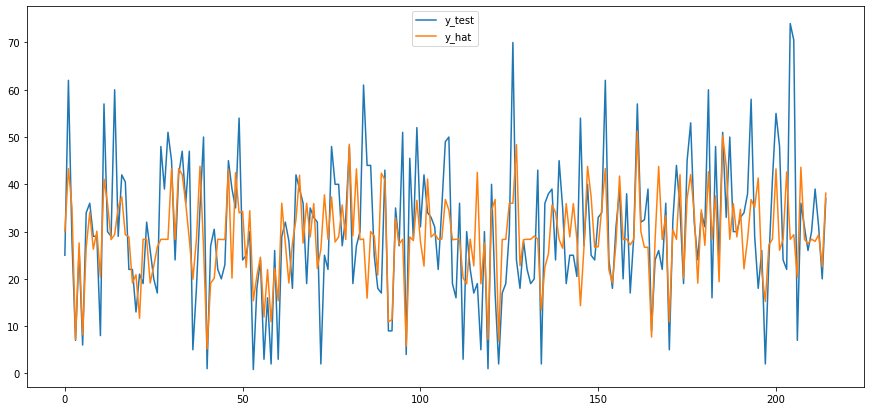

In [23]:
y_hat = lr.predict(X_test)

plt.figure(figsize=(15, 7))

plt.plot(y_test, label='y_test')
plt.plot(y_hat, label='y_hat')
plt.legend(loc= 'upper center')
plt.show()

In [24]:
# RandomForest Regression
# 랜덤포레스트 회귀
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

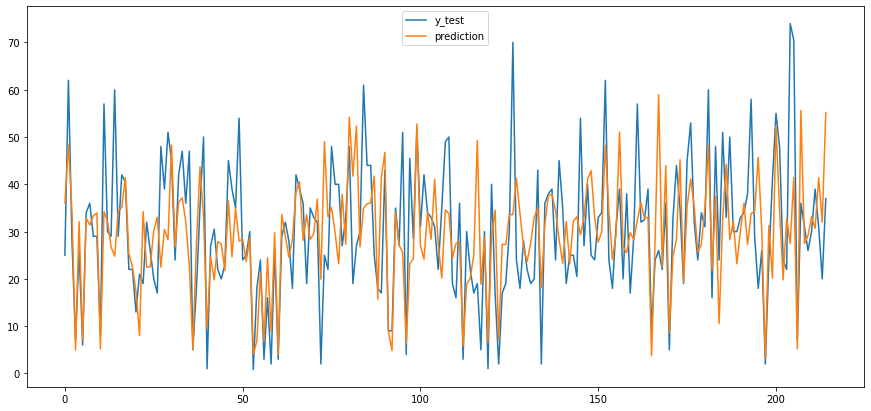

In [25]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

prediction = rfr.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(y_test, label='y_test')
plt.plot(prediction, label='prediction')
plt.legend(loc= 'upper center')
plt.show()

In [26]:
print(mean_squared_error(y_test, prediction))

152.04079346230546


In [27]:
# xgboost model
# xgboost classifer
from xgboost import XGBClassifier # model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

xgbc = XGBClassifier()
xgbc.fit(X, y)

fscore = xgbc.get_booster().get_fscore()
print(fscore)

[05:39:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'f3': 2077, 'f2': 29189, 'f4': 4285, 'f6': 3132, 'f0': 1939, 'f1': 2142}


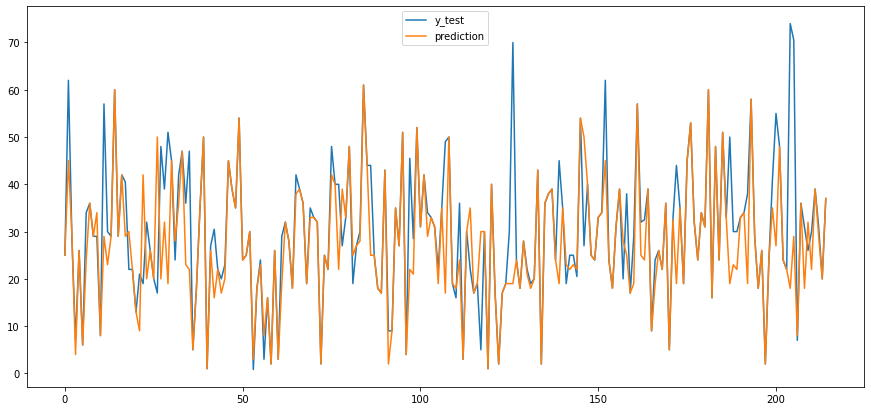

In [28]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
y_pred = xgbc.predict(X_test)

plt.figure(figsize=(15, 7))
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='prediction')
plt.legend(loc= 'upper center')
plt.show()

역시 알고리즘 경연대회에서 1등을 연속으로 차지한 모델은 달랐다. Outlier에 취약하다는 단점 이외에 거의 정확하게 예측을 해내었다.

다만 regression을 쓰지 않고 Classifier로 사용을 하였는데 오히려 regression보다 더 높은 정확도를 보여주었다.

여튼 Age에 대해서는 xgboost classifer를 사용해서 예측을 해서 NaN값들을 채워 넣도록 하겠다.

In [29]:
nan = train[train['Age'].isna()]
nan.reset_index(drop=True)
nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 6 to 889
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     177 non-null    int64  
 1   Pclass       177 non-null    int64  
 2   Name         177 non-null    object 
 3   Sex          177 non-null    int64  
 4   Age          0 non-null      float64
 5   SibSp        177 non-null    int64  
 6   Parch        177 non-null    int64  
 7   Fare         177 non-null    float64
 8   Embarked     177 non-null    int64  
 9   Family       177 non-null    int64  
 10  Solo         177 non-null    bool   
 11  Title        177 non-null    object 
 12  Label_Title  177 non-null    int64  
 13  Log_Fare     177 non-null    float64
dtypes: bool(1), float64(3), int64(8), object(2)
memory usage: 19.5+ KB


In [30]:
nan.drop('Age', axis=1, inplace=True)
nan.drop('Name', axis=1, inplace=True)
nan.drop('Parch', axis=1, inplace=True)
nan.drop('SibSp', axis=1, inplace=True)
nan.drop('Title', axis=1, inplace=True)
nan.drop('Fare', axis=1, inplace=True)
nan.drop('Survived', axis=1, inplace=True)

nan['Age'] = 0
nan['Age'] = xgbc.predict(nan)

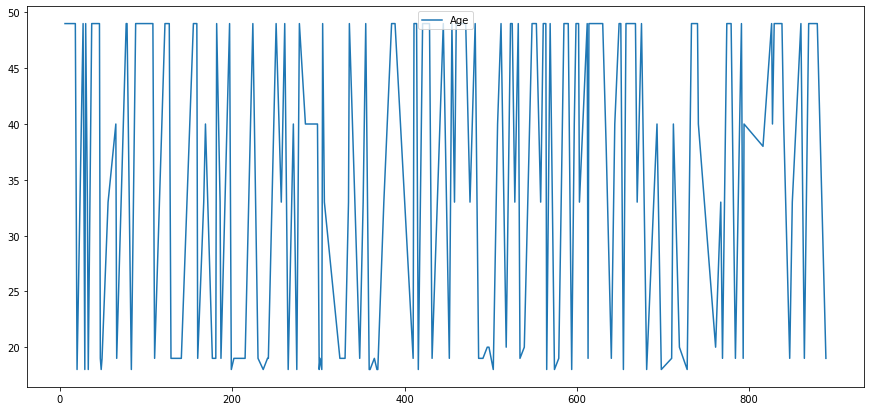

In [31]:
plt.figure(figsize=(15, 7))
plt.plot(nan['Age'], label='Age')
plt.legend(loc= 'upper center')
plt.show()

In [32]:
train['Age'].fillna(nan['Age'], inplace=True)

In [33]:
X = test[test['Age'].notna()]
X.drop('Name', axis=1, inplace=True)
X.drop('Parch', axis=1, inplace=True)
X.drop('SibSp', axis=1, inplace=True)
X.drop('Title', axis=1, inplace=True)
y = X['Age'].values
X = X.drop('Age', axis=1).values

In [34]:
nan = test[test['Age'].isna()]
nan.drop('Age', axis=1, inplace=True)
nan.drop('Name', axis=1, inplace=True)
nan.drop('Parch', axis=1, inplace=True)
nan.drop('SibSp', axis=1, inplace=True)
nan.drop('Title', axis=1, inplace=True)
nan.drop('Fare', axis=1, inplace=True)
nan.reset_index(drop=True)
nan.info()

nan['Age'] = 0
nan['Age'] = xgbc.predict(nan)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 902 to 1309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       86 non-null     int64  
 1   Sex          86 non-null     int64  
 2   Embarked     86 non-null     int64  
 3   Family       86 non-null     int64  
 4   Solo         86 non-null     bool   
 5   Label_Title  86 non-null     int64  
 6   Log_Fare     86 non-null     float64
dtypes: bool(1), float64(1), int64(5)
memory usage: 4.8 KB


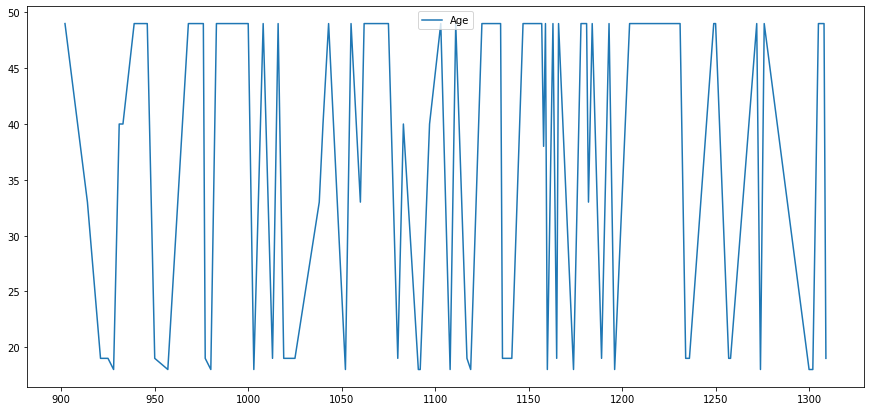

In [35]:
plt.figure(figsize=(15, 7))
plt.plot(nan['Age'], label='Age')
plt.legend(loc= 'upper center')
plt.show()

In [36]:
test['Age'].fillna(nan['Age'], inplace=True)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   Family       891 non-null    int64  
 10  Solo         891 non-null    bool   
 11  Title        891 non-null    object 
 12  Label_Title  891 non-null    int64  
 13  Log_Fare     891 non-null    float64
dtypes: bool(1), float64(3), int64(8), object(2)
memory usage: 98.3+ KB


In [38]:
train.drop('Name', axis=1, inplace=True)
train.drop('SibSp', axis=1, inplace=True)
train.drop('Parch', axis=1, inplace=True)
train.drop('Title', axis=1, inplace=True)
train.drop('Fare', axis=1, inplace=True)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Embarked     891 non-null    int64  
 5   Family       891 non-null    int64  
 6   Solo         891 non-null    bool   
 7   Label_Title  891 non-null    int64  
 8   Log_Fare     891 non-null    float64
dtypes: bool(1), float64(2), int64(6)
memory usage: 63.5 KB


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Name         418 non-null    object 
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
 8   Family       418 non-null    int64  
 9   Solo         418 non-null    bool   
 10  Title        418 non-null    object 
 11  Label_Title  418 non-null    int64  
 12  Log_Fare     418 non-null    float64
dtypes: bool(1), float64(3), int64(7), object(2)
memory usage: 42.9+ KB


In [41]:
test.drop('Name', axis=1, inplace=True)
test.drop('SibSp', axis=1, inplace=True)
test.drop('Parch', axis=1, inplace=True)
test.drop('Title', axis=1, inplace=True)
test.drop('Fare', axis=1, inplace=True)

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    int64  
 2   Age          418 non-null    float64
 3   Embarked     418 non-null    int64  
 4   Family       418 non-null    int64  
 5   Solo         418 non-null    bool   
 6   Label_Title  418 non-null    int64  
 7   Log_Fare     418 non-null    float64
dtypes: bool(1), float64(2), int64(5)
memory usage: 26.5 KB


In [43]:
# Machine Learning to predict 'Survived'
# Survived 예측 위한 머신러닝
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
K_fold = KFold(n_splits=10, shuffle=True, random_state=0)

X = train.drop('Survived', axis=1).values
y = train['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

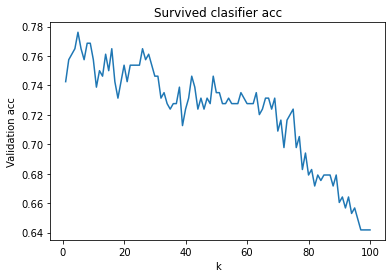

0.7761194029850746
4


76.1

In [44]:
# 1.0 KNeighborsClassifier
# 1.0 changing K values

acc = []
for k in range(1, 101):
    knc = KNeighborsClassifier(n_neighbors = k)
    knc.fit(X_train, y_train)
    acc.append(knc.score(X_test, y_test))
    
plt.plot(range(1, 101), acc)
plt.xlabel('k')
plt.ylabel('Validation acc')
plt.title('Survived clasifier acc')
plt.show()

tmp = max(acc)
print(tmp)
index = acc.index(tmp)
print(index)

clf = KNeighborsClassifier(n_neighbors = index)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=K_fold, n_jobs=1, scoring=scoring)

# kNN score
round(np.mean(score) * 100, 2) # 10번 시행시 평균 정확도

K = 16일때 77.6%로의 확률로 validation set에 대해 정답을 맞추었다.

K = 16일때에 대해 교차 검증까지 진행해보겠다.

교차검증 결과 평균 정확도는 76.1%가 나왔다.

In [45]:
models = []
knc = KNeighborsClassifier(n_neighbors = 4)
knc.fit(X_train, y_train)
models.append(knc)

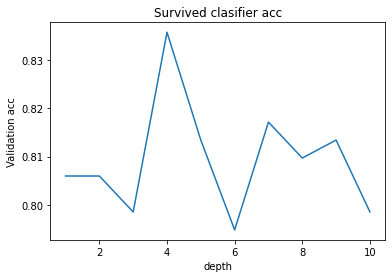

가장 높았던 정확도 0.835820895522388
4의 depth일 때 가장 정확도가 높았다


82.04

In [46]:
# 1.1 DecisionTreeClassifier
# 1.1 changing max_depth
acc1 = []
dtc_m = []
for i in range(1, 11):
    dtc = DecisionTreeClassifier(max_depth = i, random_state = 0)
    dtc.fit(X_train, y_train)
    dtc_m.append(dtc)
    acc1.append(dtc.score(X_test, y_test))
    
plt.plot(range(1, 11), acc1)
plt.xlabel('depth')
plt.ylabel('Validation acc')
plt.title('Survived clasifier acc')
plt.show()

tmp = max(acc1)
index = acc1.index(tmp)
print('가장 높았던 정확도 ' + str(tmp))
print(str(index + 1) + '의 depth일 때 가장 정확도가 높았다')

clf1 = DecisionTreeClassifier(max_depth = index, random_state = 0)
scoring = 'accuracy'
score1 = cross_val_score(clf1, X, y, cv=K_fold, n_jobs=1, scoring=scoring)

# kNN score
round(np.mean(score1) * 100, 2) # 10번 시행시 평균 정확도

max_depth = 4 일때 가장 정확도가 높았다. 대략 83.5%

교차검증결과 평균 정확도는 82.04%로 나왔다.

In [47]:
dtc = DecisionTreeClassifier(max_depth = 4, random_state = 0)
dtc.fit(X_train, y_train)
models.append(dtc)

['Pclass', 'Sex', 'Age', 'Embarked', 'Family', 'Solo', 'Label_Title', 'Log_Fare']


[Text(837.0, 978.48, 'X[1] <= 1.5\ngini = 0.479\nsamples = 623\nvalue = [375, 248]'),
 Text(418.5, 761.0400000000001, 'X[0] <= 0.5\ngini = 0.322\nsamples = 397\nvalue = [317, 80]'),
 Text(209.25, 543.6, 'X[2] <= 36.5\ngini = 0.467\nsamples = 86\nvalue = [54, 32]'),
 Text(104.625, 326.1600000000001, 'X[7] <= 3.657\ngini = 0.5\nsamples = 37\nvalue = [18, 19]'),
 Text(52.3125, 108.72000000000003, 'gini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(156.9375, 108.72000000000003, 'gini = 0.461\nsamples = 25\nvalue = [16, 9]'),
 Text(313.875, 326.1600000000001, 'X[7] <= 3.301\ngini = 0.39\nsamples = 49\nvalue = [36, 13]'),
 Text(261.5625, 108.72000000000003, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(366.1875, 108.72000000000003, 'gini = 0.427\nsamples = 42\nvalue = [29, 13]'),
 Text(627.75, 543.6, 'X[6] <= 2.0\ngini = 0.261\nsamples = 311\nvalue = [263, 48]'),
 Text(523.125, 326.1600000000001, 'X[4] <= 4.5\ngini = 0.499\nsamples = 27\nvalue = [14, 13]'),
 Text(470.8125, 108.72000000

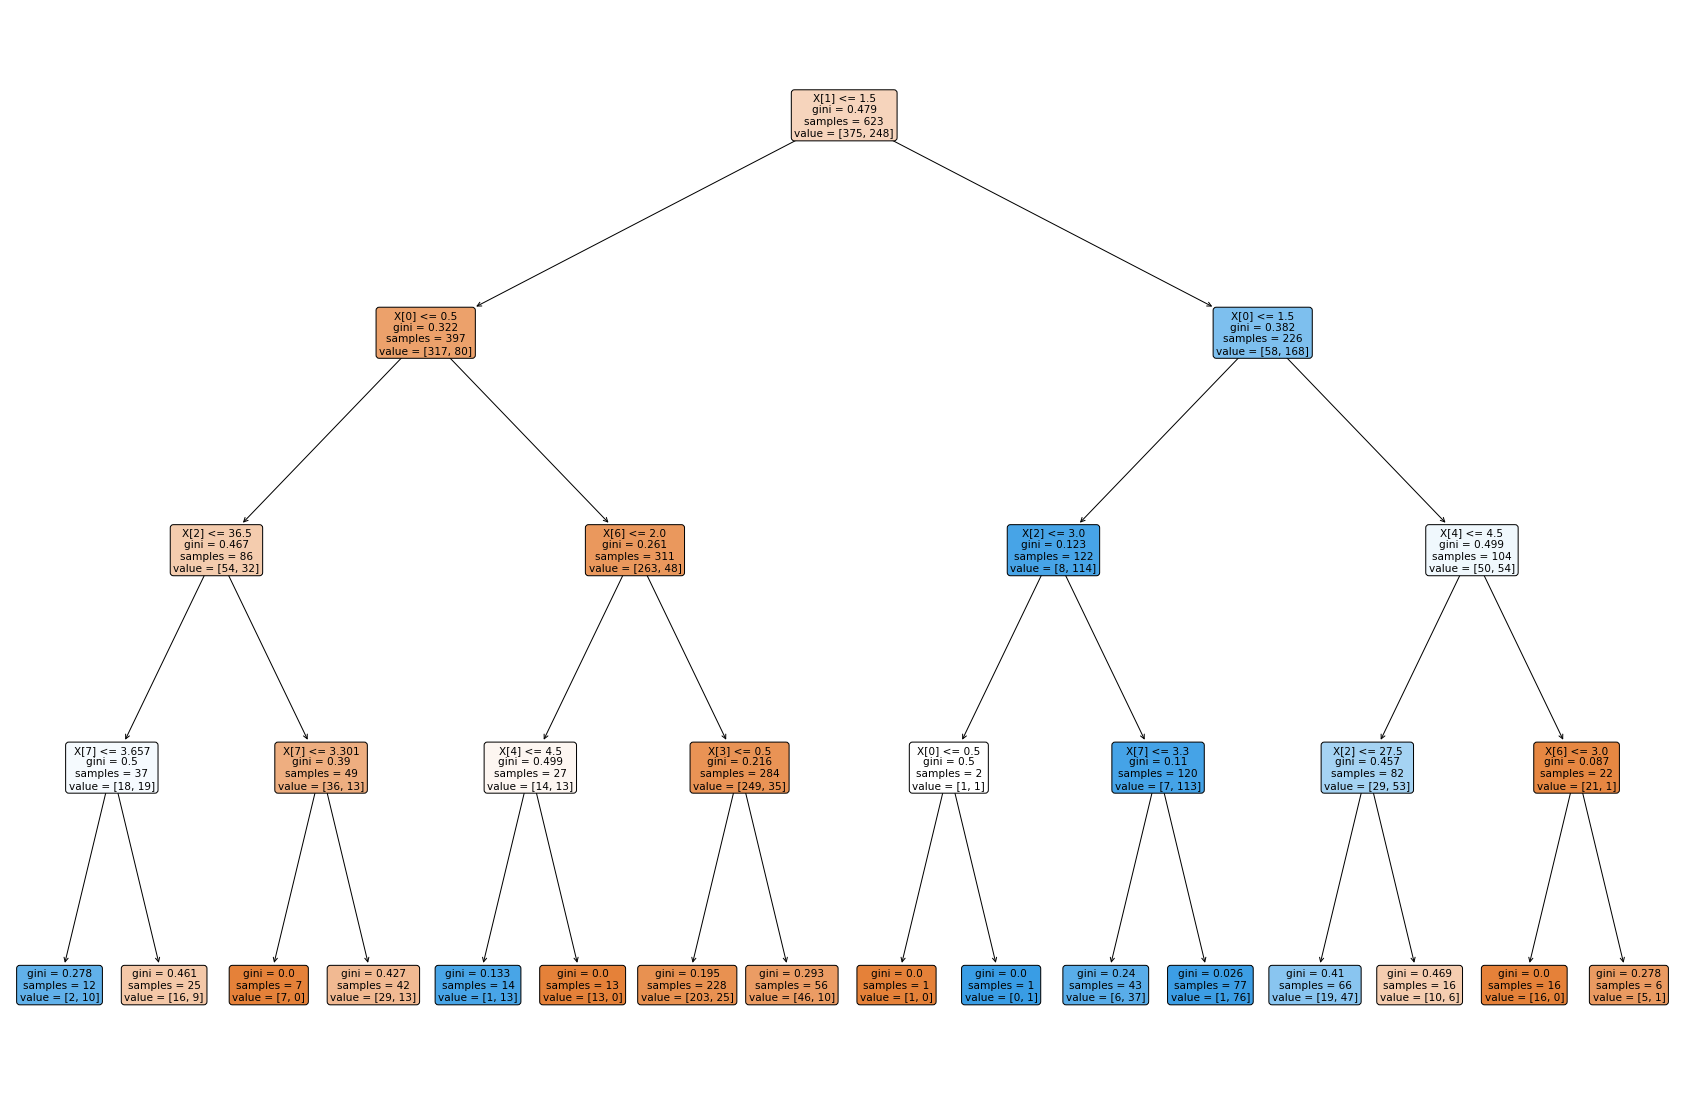

In [48]:
from sklearn import tree

features = []
target = {0: 'Alive', 1: 'Dead'}
for col in train:
    if col != 'Survived':
        features.append(col)
print(features)

plt.figure( figsize=(30, 20) )
tree.plot_tree(dtc_m[index], impurity=True, filled=True,
               rounded=True)

decision tree를 시각화

In [49]:
# 1.2 RandomFroestClassifier with hypter_parameter_tuning
# 1.2.0 Deafault RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Default RandomForestClassifier acc : {:.4f}'.format(accuracy))

clf2 = RandomForestClassifier(n_estimators = 10)
scoring = 'accuracy'
score2 = cross_val_score(clf2, X, y, cv=K_fold, n_jobs=1, scoring=scoring)

round(np.mean(score2) * 100, 2)

Default RandomForestClassifier acc : 0.8172


81.7

나름 준수한 성능을 보여주었다. 83.5%의 확률로 valid_set에 대해서 예측하였다

교차검증결과 평균 79.24%의 성능을 보여주었다.

In [50]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
models.append(rfc)

In [51]:
# 1.2.1 using GridSearchCV to hyper parameter tuning
params = { 'n_estimators' : [10, 100],
           'max_depth' : [4, 6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }
rfc_n = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rfc_n, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 10}
최고 예측 정확도: 0.8154


?? GridSearchCv를 통해서 최적의 paramete를 찾아서 학습을 시킬 수 있다는데 오히려 떨어졌다.

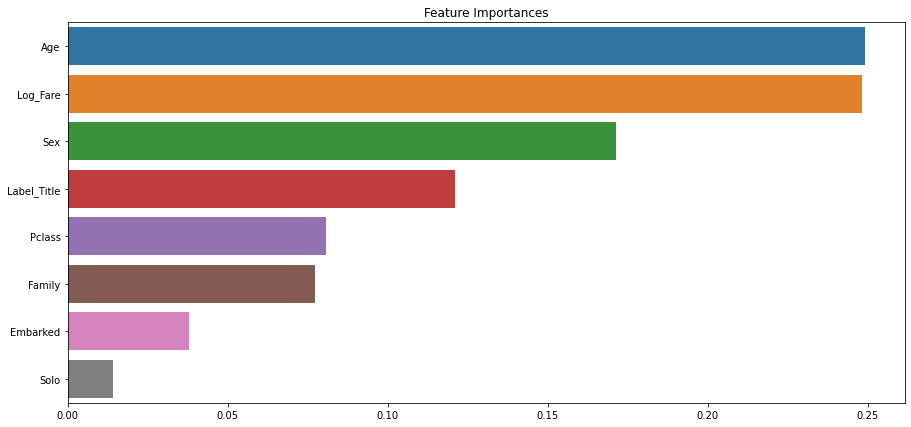

In [52]:
# 1.2 visualize feature importance
# 1.2 컬럼 중요도 시각화
ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = (train.drop('Survived', axis=1)).columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(15,7))
plt.title('Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

예상 밖으로 Sex가 가장 높은 feature로 나오지 않았다

1. Log_Fare
2. Age
3. Sex
4. Label_Title
5. Pclass
6. Family
7. Embarked
8. Solo

순으로 중요도가 매겨졌다.

In [53]:
# 1.3 SVC of SVM
# 1.3.0 kernel = 'linear'
clf3 = SVC(kernel = 'linear')
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

scoring = 'accuracy'
score3 = cross_val_score(clf3, X, y, cv=K_fold, n_jobs=1, scoring=scoring)
print(round(np.mean(score3) * 100, 2))

Accuracy: 0.80
78.79


Linear kernel로 학습한 모델에 대해서 교차검증한 결과 평균 정확도는 78.79%로 나타났다

In [54]:
models.append(clf3)

In [55]:
# 1.3.1 kernel = 'rbf'
clf3_1 = SVC(kernel = 'rbf')
clf3_1.fit(X_train, y_train)

y_pred1 = clf3_1.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

scoring = 'accuracy'
score3_1 = cross_val_score(clf3_1, X, y, cv=K_fold, n_jobs=1, scoring=scoring)
print(round(np.mean(score3_1) * 100 , 2))

Accuracy: 0.80
67.8


선형적인 성향이 강한 것인지 비선형적인 rbf kernel로 학습시킨 모델에 대해서 교차검증한 결과 평균 정확도는 67.8%로 상당히 낮게 나왔다.

In [56]:
col_names = []
for col in test:
    col_names.append(col)
    
columns = np.array(col_names)

In [57]:
# 1.4 XGBClassifier
clf4 = XGBClassifier(eval_metric='logloss')
clf4.fit(X_train, y_train)

pred = clf4.predict(X_test)
fscore1 = clf4.get_booster().get_fscore()
print(fscore1)

print('acc of XGBClassifier : {:.2f}%'.format(accuracy_score(y_test, pred) * 100))

scoring = 'accuracy'
score4 = cross_val_score(clf4, X, y, cv=K_fold, n_jobs=1, scoring=scoring)
print('K_fold 교차 검증 결과: ' + str(round(np.mean(score4) * 100 , 2)) + '%')

{'f1': 52, 'f0': 58, 'f2': 660, 'f7': 744, 'f6': 48, 'f4': 94, 'f3': 70}
acc of XGBClassifier : 83.96%
K_fold 교차 검증 결과: 81.26%


역시나 XGBClassifier()

84%에 근접하는 성능을 보여주었다. 물론 진짜 test set으로는 아직 예측을 진행하지 않았지만 지금까지 한 모델 중 가장 높은 정확도를 보여주고 있다.

교차 검증 결과도 평균 정확도 81.26%의 준수한 성능을 보여주었다. 

In [58]:
models.append(clf4)

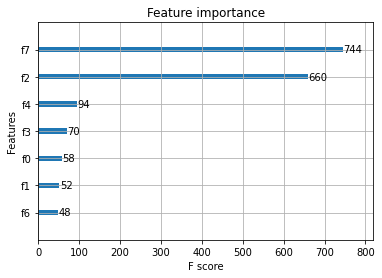

In [59]:
from xgboost import plot_importance
ax = plot_importance(clf4)

feature importance에 대해 plot을 그려보았는데 f1, f2 ... 가 무엇인지 표시가 안된다 구글링을 해보니 column을 넣어줘야 한다는데 넣어줬었더니 

그냥 column ndarray 안의 순서대로 찍혀서 나온다.... 다른 방법이 있을 거 같긴 한데 모르겠다.

In [60]:
# Conclusion of prediction
# Model 총 정리

models

[KNeighborsClassifier(n_neighbors=4),
 DecisionTreeClassifier(max_depth=4, random_state=0),
 RandomForestClassifier(),
 SVC(kernel='linear'),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
               gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.300000012,
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=4,
               num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
               scale_pos_weight=1, subsample=1, tree_method='exact',
               validate_parameters=1, verbosity=None)]

In [61]:
union_ss = []
X = test.values
for i in models:
    new_df = pd.DataFrame()
    new_df['Survived'] = i.predict(X)
    union_ss.append(new_df)

union_ss에 들어가 있는 순서

1. KNeighborsClassifier

2. DecisionTreeClassifier

3. RandomForestClassifier

4. SVC('linear')

5. XGBClassifier

# 마치면서

열심히 분석하고 노력하였지만 처음 무지성 분석을 뛰어넘지 못하고 똑같은 score를 갖는 모델을 만들어내었다.

Test Set에서 가장 놀라운 성능을 보였던 XGBClassifier가 1등을 할줄 알았지만 SVC('linear')에 밀리며 2등을 차지하였다.

아마 학습에 있어서 feature들에 범주형 변수가 많아서 Linear한 SVC가 가장 좋은 성능을 낸 것 같다는 생각이 들었다.

타이타닉은 이렇게 마무리짓지만 앞으로도 다른 Competition에 대해서 열심히 해보겠습니다.

*나에게 감사합니다.*

In [62]:
index = 1
for i in union_ss:
    i['PassengerId'] = ss1['PassengerId']
    i.to_csv(f'{index}model_submission.csv', index=False)
    index += 1